In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def coth(z):
    """Cotangente hiperbólica"""
    return 1 / np.tanh(z)

def arccoth(z):
    """Arco-cotangente hiperbólica"""
    return 0.5 * np.log((z + 1) / (z - 1))

def mt_1d_forward(frequencies, resistivities, thicknesses):
    """
    Modelagem direta MT 1D usando o método da Função C (Constable et al., 1987)

    Parâmetros:
    - frequencies: array de frequências (Hz)
    - resistivities: array de resistividades por camada (Ohm.m)
    - thicknesses: array de espessuras por camada (m), sem incluir última camada (que é semi-infinita)

    Retorna:
    - rho_aparente: resistividade aparente para cada frequência
    - fase: fase para cada frequência (graus)
    """
    mu0 = 4 * np.pi * 1e-7  # permeabilidade do vácuo (H/m)
    n_layers = len(resistivities)

    rho_aparente = []
    fase = []

    for f in frequencies:
        omega = 2 * np.pi * f
        k = np.sqrt(1j * omega * mu0 / resistivities)  # vetor k para todas camadas

        # Inicialização na última camada (semi-infinita)
        C = 1 / k[-1]

        # Recorrência para camadas de baixo para cima
        for j in reversed(range(n_layers-1)): 
            arg = k[j] * thicknesses[j] + arccoth(k[j] * C)
            C = (1 / k[j]) * coth(arg)


        # No topo (C da primeira camada)
        rho_a = (mu0 * omega) * abs(C)**2
#         phi = np.arctan2(np.imag(C), np.real(C)) * (180/np.pi)  # converte para graus
        phi = np.angle(C, deg=True)  # converte para graus

        rho_aparente.append(rho_a)
        fase.append(phi)

    return np.array(rho_aparente), np.array(fase)



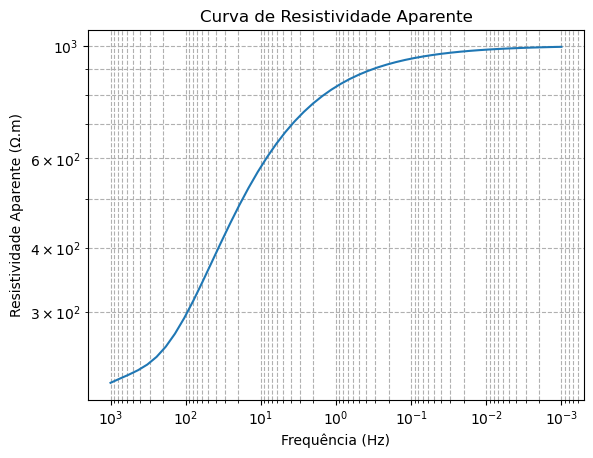

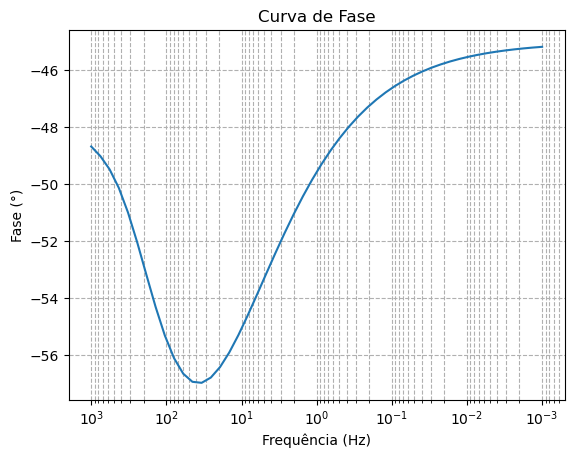

In [4]:
# Frequências de interesse (Hz)
frequencies = np.logspace(-3, 3, 50)  # de 1 mHz a 1 kHz

# Definição do modelo
resistivities = np.array([200,300,500,1000])  # em Ohm.m
thicknesses = np.array([100,300,400])  # em metros (2 camadas + semi-infinita)

rho_a, phi = mt_1d_forward(frequencies, resistivities, thicknesses)


plt.figure()
plt.loglog(frequencies, rho_a)
plt.gca().invert_xaxis()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Resistividade Aparente (Ω.m)')
plt.title('Curva de Resistividade Aparente')
plt.grid(True, which='both', ls='--')
plt.show()

plt.figure()
plt.semilogx(frequencies, phi)
plt.gca().invert_xaxis()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (°)')
plt.title('Curva de Fase')
plt.grid(True, which='both', ls='--')
plt.show()


In [5]:
rho_a

array([994.0570533 , 993.16043046, 992.12907958, 990.94293605,
       989.57900664, 988.01096204, 986.20867955, 984.13773233,
       981.75882245, 979.02715612, 975.89176171, 972.29475447,
       968.1705561 , 963.44508443, 958.03493742, 951.84660854,
       944.77578774, 936.70682476, 927.51246081, 917.05397133,
       905.1819067 , 891.73766902, 876.55621709, 859.47024242,
       840.31619266, 818.94251621, 795.22043379, 769.05737384,
       740.41290193, 709.31650305, 675.88594623, 640.34423656,
       603.03248682, 564.41564553, 525.07816548, 485.70758664,
       447.06563357, 409.94846049, 375.13946278, 343.35882077,
       315.21309235, 291.1458787 , 271.38820922, 255.90779897,
       244.36405299, 236.09336236, 230.1692515 , 225.57554932,
       221.46167096, 217.34142151])